# Assignment 1: Data Loading and Manipulation in Python
**Iftekhar Rafi B00871031**

**Abdulla Sadoun B00900541**

## Question 1: Dataset Selection and Loading (5 points)

### a) Dataset Selection
For this assignment, I have selected the **CSE-CIC-IDS2018** dataset from the **Canadian Institute for Cybersecurity at the University of New Brunswick**. This dataset is well-suited for analyzing **network intrusion detection**. Several methods of network intrusion have been explored in this research and subsequent dataset. I will be focusing on the dataset collected from **brute-force attack scenarios** as described in the research. The data is taken from their processed dataset for Wednesday, 14 February as described below.

#### Dataset Details
- **Source**: [CICIDS 2018 Dataset](https://www.unb.ca/cic/datasets/ids-2018.html)
- **Types of Attacks Covered**: Brute-force attacks (FTP and SSH)

| Attacker                     | Victim                          | Attack Name      | Date          | Attack Start Time | Attack Finish Time |
|------------------------------|---------------------------------|------------------|---------------|-------------------|--------------------|
| 172.31.70.4 (Valid IP:18.221.219.4) | 172.31.69.25 (Valid IP:18.217.21.148) | FTP-BruteForce   | Wed-14-02-2018 | 10:32             | 12:09              |
| 172.31.70.6 (Valid IP:13.58.98.64)  | 18.217.21.148- 172.31.69.25          | SSH-BruteForce   | Wed-14-02-2018 | 14:01             | 15:31              |


### b) Dataset Loading
The dataset was loaded into a Pandas DataFrame using the following code:




In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())
df.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pk

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


### c) Description of the Dataset

The dataset consists of network traffic data collected on **February 14, 2018**, as part of the **CSE-CIC-IDS2018** dataset. It captures various network activities, including normal (benign) traffic and brute-force attacks targeting FTP and SSH services. The dataset includes **1,048,575 rows** and **80 columns**, each representing different characteristics of the network flows.

Here is a breakdown of the dataset:
- **Total Number of Records**: 1,048,575
- **Total Number of Features (Columns)**: 80
- **Types of Data**:
  - **Numeric Features**: Most of the columns are numeric, such as packet counts, flow durations, and packet sizes. These can help analyze the behavior of network traffic.
  - **Categorical Features**: The dataset includes a column labeled "Label," which identifies whether a given flow is benign or part of a specific attack type.

### Key Features in the Dataset
- **Flow Duration**: Measures how long a network flow lasted.
- **Total Forward and Backward Packets** (`Tot Fwd Pkts`, `Tot Bwd Pkts`): Counts the number of packets sent in the forward and backward directions.
- **Packet Length Statistics**: Provides information about the maximum, minimum, average, and standard deviation of packet lengths in both directions.
- **Flow Rate (`Flow Byts/s`, `Flow Pkts/s`)**: Indicates the number of bytes or packets transmitted per second during a flow.
- **Inter-Arrival Time**: Measures the time between consecutive packets.
- **Flags**: Various TCP flags, such as `SYN`, `ACK`, and `RST`, are used to indicate specific network conditions.
- **Active and Idle Times**: Represents the time intervals when the flow was actively transmitting data and when it was idle.

### Dataset Usage
The data can be used to detect and analyze network intrusions, specifically **brute-force attacks**. By examining patterns in traffic, such as sudden spikes in flow rates or repeated login attempts, it is possible to identify suspicious behaviors indicative of an ongoing attack.

### Example Records
Each row in the dataset represents a network flow, containing information like the flow's duration, the total number of packets, and the size of packets transmitted in both directions. The dataset also provides a label indicating whether the flow is normal (benign) or an attack.

Overall, this dataset is useful for tasks such as detecting brute-force attacks and understanding the characteristics of network traffic during different types of events.

## Question 2: Data Exploration (5 points)

### a) Basic Statistics of Numerical Features

The table below shows the basic statistics for the numerical features in the dataset, including mean, median, standard deviation, minimum, and maximum values.


In [ ]:
# Calculate and display basic statistics for all numerical columns
basic_stats = df.describe().transpose()
basic_stats[['mean', '50%', 'std', 'min', 'max']]


,mean,50%,std,min,max
Dst Port,4.876262e+03,53.0,1.444344e+04,0.000000e+00,6.553300e+04
Protocol,8.107557e+00,6.0,4.460625e+00,0.000000e+00,1.700000e+01
Flow Duration,6.255555e+06,1023.0,1.260291e+09,-9.190110e+11,1.200000e+08
Tot Fwd Pkts,6.206622e+00,2.0,4.447851e+01,1.000000e+00,5.115000e+03
Tot Bwd Pkts,7.211191e+00,1.0,1.048682e+02,0.000000e+00,9.198000e+03
...,...,...,...,...,...
Active Min,3.995477e+04,0.0,5.602693e+05,0.000000e+00,1.102401e+08
Idle Mean,3.101206e+06,0.0,5.414780e+08,0.000000e+00,3.394503e+11
Idle Std,7.297218e+05,0.0,3.820031e+08,0.000000e+00,2.432682e+11
Idle Max,4.812391e+06,0.0,1.522117e+09,0.000000e+00,9.797810e+11


### b) Data Distribution for Selected Features

We will analyze the data distribution for the following four features:
1. **Flow Duration**
2. **Tot Fwd Pkts** (Total Forward Packets)
3. **Fwd Pkt Len Mean** (Mean Forward Packet Length)
4. **Flow Byts/s** (Flow Bytes per Second)

We will use histograms to visualize the distribution and examine whether these features are normally distributed, skewed, or exhibit other characteristics.


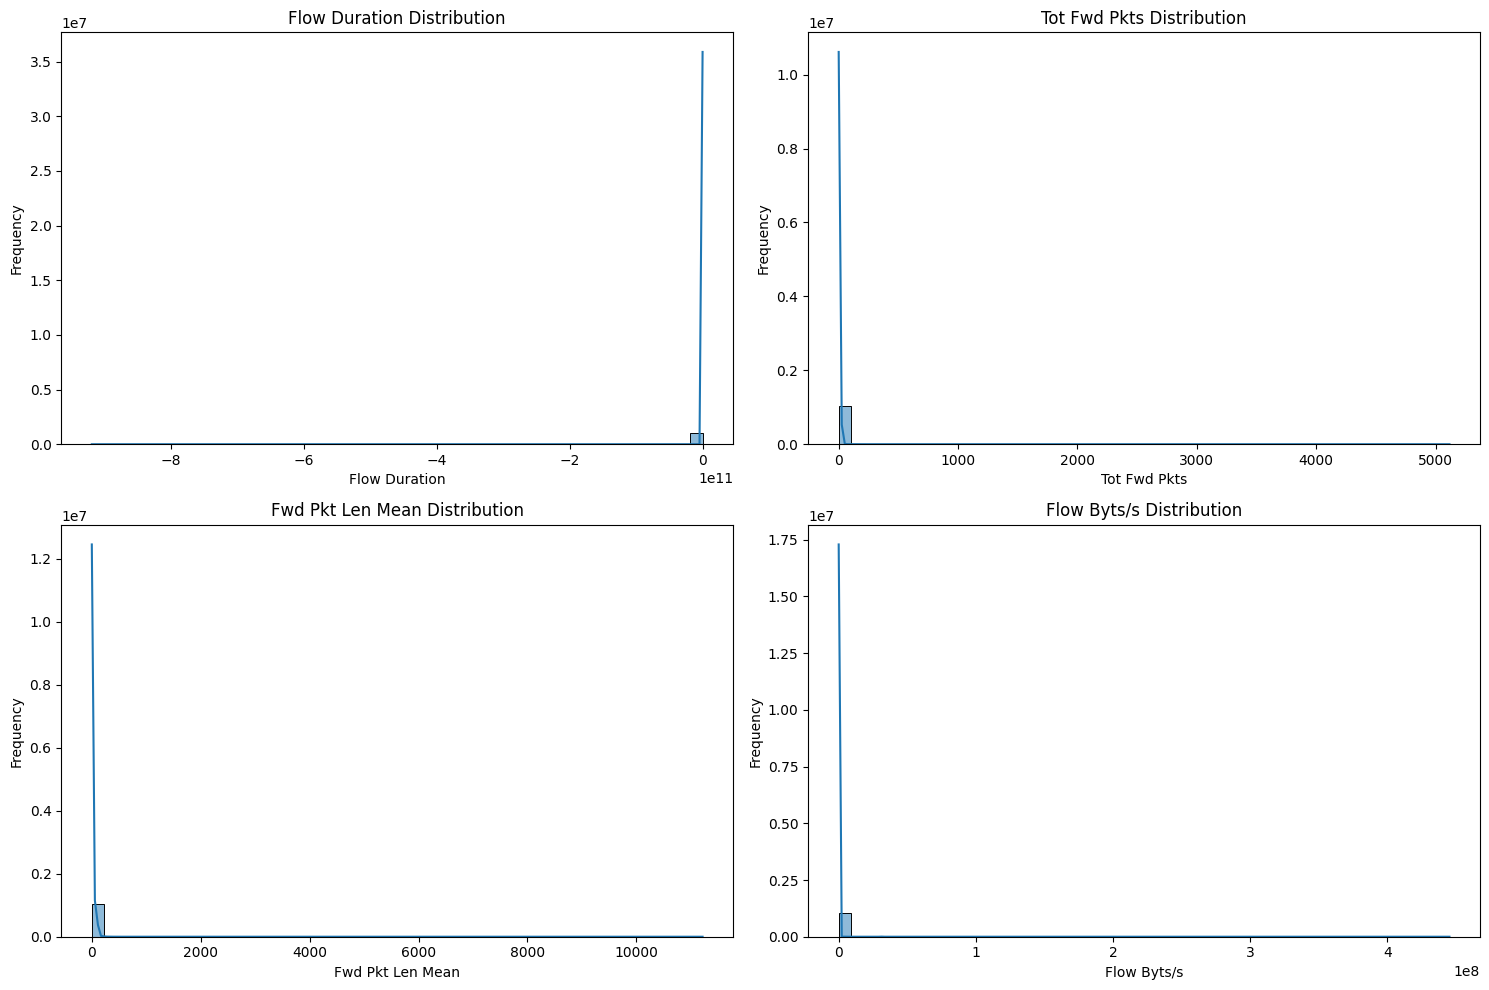

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# List of features to analyze
features = ['Flow Duration', 'Tot Fwd Pkts', 'Fwd Pkt Len Mean', 'Flow Byts/s']

# Plot histograms for each selected feature
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.histplot(df[feature], bins=50, ax=axs[row, col], kde=True)
    axs[row, col].set_title(f'{feature} Distribution')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Interpretation of the Results

1. **Flow Duration**:
   - The distribution of "Flow Duration" is highly right-skewed, with the majority of flows having very short durations. There are some outliers with extremely long durations, creating a long tail on the right. This suggests that most network activities involve brief communication sessions.

2. **Tot Fwd Pkts (Total Forward Packets)**:
   - The "Tot Fwd Pkts" feature also shows a right-skewed distribution. Most flows have a small number of forward packets, indicating short or less intensive interactions. There are a few instances with a very high number of packets, which could be indicative of specific network behaviors like large data transfers.

3. **Fwd Pkt Len Mean (Mean Forward Packet Length)**:
   - The distribution of "Fwd Pkt Len Mean" is heavily concentrated around lower values, with a rapid drop-off as packet lengths increase. This indicates that most packets in the dataset are small in size, which is common for certain types of network traffic like control messages or lightweight data transfers.

4. **Flow Byts/s (Flow Bytes per Second)**:
   - The "Flow Byts/s" feature is extremely skewed to the right, with most flows having a very low data rate. This suggests that a significant portion of the network traffic is not bandwidth-intensive, with only a few flows having very high data transfer rates, possibly due to specific attacks or large file transfers.

The visualizations and statistical summaries indicate that the data distributions for these features are not normally distributed and exhibit significant skewness. This is typical for network traffic data, where certain types of behavior (e.g., large data transfers or attacks) are rare compared to normal traffic.

These insights can help guide further analysis, such as identifying anomalies or specific patterns associated with network attacks like brute-force attempts.

## Question 3: Data Visualization (5 points)

### a) Histogram for Numerical Features
For this part, we will generate a histogram for a different numerical feature, **"Pkt Len Mean"** (Mean Packet Length), which was not used in Question 2b. We will choose an appropriate bin size to make the distribution more meaningful.


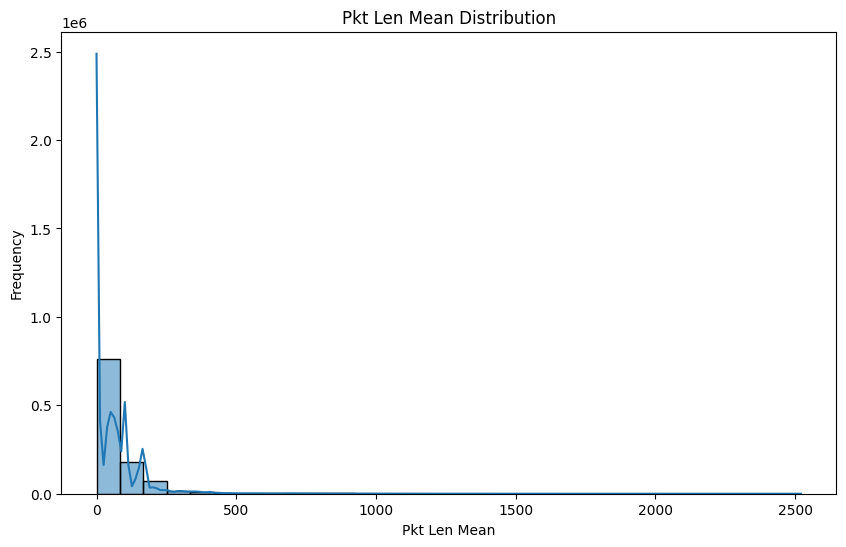

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a histogram for "Pkt Len Mean" with a custom bin size
plt.figure(figsize=(10, 6))
sns.histplot(df['Pkt Len Mean'], bins=30, kde=True)
plt.title('Pkt Len Mean Distribution')
plt.xlabel('Pkt Len Mean')
plt.ylabel('Frequency')
plt.show()


### b) Scatter Plot to Visualize the Relationship Between Two Numerical Features
To analyze the relationship between **"Flow Duration"** and **"TotLen Fwd Pkts"** (Total Length of Forward Packets), we will create a scatter plot. This will help us understand if there is any correlation between the duration of the flow and the total amount of data sent in the forward direction.


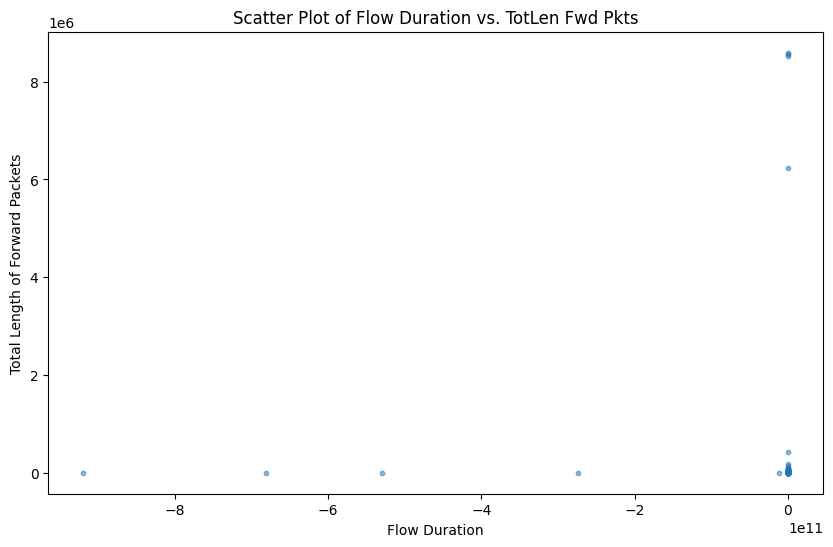

In [ ]:
# Create a scatter plot for "Flow Duration" vs. "TotLen Fwd Pkts"
plt.figure(figsize=(10, 6))
plt.scatter(df['Flow Duration'], df['TotLen Fwd Pkts'], alpha=0.5, s=10)
plt.title('Scatter Plot of Flow Duration vs. TotLen Fwd Pkts')
plt.xlabel('Flow Duration')
plt.ylabel('Total Length of Forward Packets')
plt.show()


## Question 4: Data Manipulation (5 points)

### a) Selecting a Subset of Rows
We will select a subset of rows from the dataset where the **"Flow Duration"** is greater than **1 million microseconds** (approximately 1 second) and the entries contain both benign and attack data. This condition will help us focus on longer network flows, which might indicate more intensive network activities.


In [ ]:
# Select a subset with both benign and attack data
subset_df = df[(df['Flow Duration'] > 1_000_000) | (df['Label'] != 'Benign')]

# Check the distribution of the "Label" column
print(subset_df['Label'].value_counts())

# Display the first few rows of the subset
subset_df.head()

Label
Benign            237872
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


### b) Grouping the Data Based on a Categorical Feature
We will group the data by the **"Label"** feature (e.g., Benign vs. Attack) and calculate the mean and median of **"Tot Fwd Pkts"** and **"Pkt Len Mean"** within each group. This will help us understand the differences in these features between benign traffic and potential attacks.


In [ ]:
# Group the data by "Label" and calculate the mean and median for selected features
grouped_stats = subset_df.groupby('Label')[['Tot Fwd Pkts', 'Pkt Len Mean']].agg(['mean', 'median'])

# Display the grouped statistics
grouped_stats


Tot Fwd Pkts        Pkt Len Mean            
                       mean median         mean      median
Label                                                      
Benign            13.535448    8.0   147.572377  151.055556
FTP-BruteForce     1.000000    1.0     0.000000    0.000000
SSH-Bruteforce    11.723651   19.0    51.444690   93.408163

### c) Visualizations for the Manipulated Data
We will create two visualizations for the selected and grouped data:
1. **Bar Plot**: To show the average "Tot Fwd Pkts" for each "Label" category.
2. **Box Plot**: To visualize the distribution of "Pkt Len Mean" within each "Label" category.


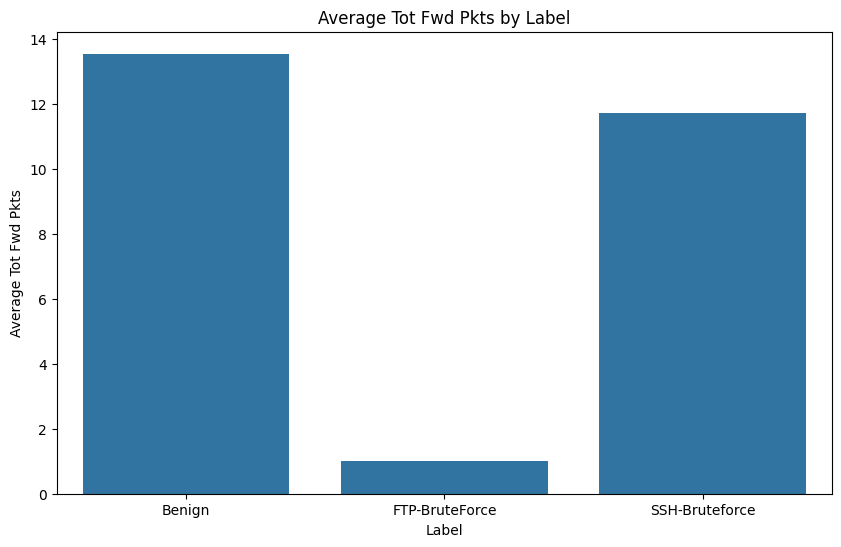

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


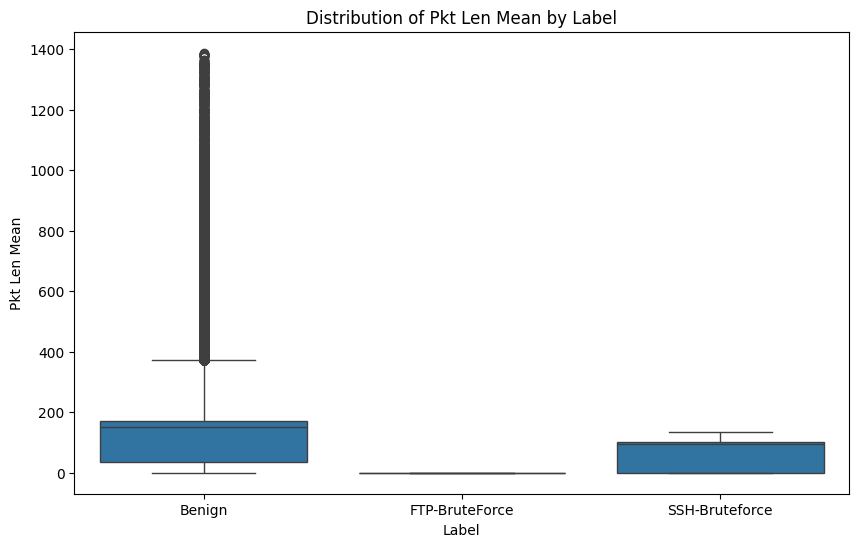

In [ ]:
# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot for average "Tot Fwd Pkts" by "Label"
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_stats.index, y=grouped_stats['Tot Fwd Pkts']['mean'])
plt.title('Average Tot Fwd Pkts by Label')
plt.xlabel('Label')
plt.ylabel('Average Tot Fwd Pkts')
plt.show()

# Box Plot for "Pkt Len Mean" by "Label"
plt.figure(figsize=(10, 6))
sns.boxplot(x=subset_df['Label'], y=subset_df['Pkt Len Mean'])
plt.title('Distribution of Pkt Len Mean by Label')
plt.xlabel('Label')
plt.ylabel('Pkt Len Mean')
plt.show()

### 1. **Bar Plot: Average Tot Fwd Pkts by Label**
   - The bar plot shows that benign traffic has a significantly higher average number of forward packets compared to both types of brute-force attacks.
   - **FTP-BruteForce** traffic has the lowest average number of forward packets, indicating that these attack flows tend to involve fewer packet exchanges. This makes sense, as brute-force attacks often involve multiple short connection attempts with minimal data transfer.
   - **SSH-Bruteforce** traffic has a higher average compared to FTP but is still lower than benign traffic, suggesting a similar pattern of short connection attempts.

### 2. **Box Plot: Distribution of Pkt Len Mean by Label**
   - The box plot indicates that the distribution of mean packet length for benign traffic is wider and has a higher median compared to the attack traffic.
   - **FTP-BruteForce** traffic shows a very narrow distribution, with most packet lengths concentrated around lower values. This could indicate uniform and small-sized requests during the attack.
   - **SSH-Bruteforce** traffic has a slightly wider range than FTP, but still significantly lower than benign traffic, which suggests less variability in packet sizes.
   - The presence of many outliers in the benign category suggests that regular network traffic can be more unpredictable, while brute-force attacks have more consistent packet characteristics.